In [337]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [338]:
mouse_drug_data = "mouse_drug_data.csv"
clinical_trial_data = "clinicaltrial_data.csv"

mouse_df = pd.read_csv(mouse_drug_data)
clinical_df = pd.read_csv(clinical_trial_data)

mouse_and_clinical = pd.merge(mouse_df,clinical_df)
mouse_and_clinical_df = mouse_and_clinical[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug"]]
mouse_and_clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


In [339]:
# Tumor Response to Treatment

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

drug_timepoint_grouped = mouse_and_clinical_df.groupby(['Drug','Timepoint'])
mean_tumor_volume = drug_timepoint_grouped["Tumor Volume (mm3)"].mean()

# Convert to DataFrame

mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame

mean_tumor_volume_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [340]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

from scipy.stats import sem

standard_error_tv = drug_timepoint_grouped["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

standard_error_tv_df = pd.DataFrame(standard_error_tv)

# Preview DataFrame

standard_error_tv_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [341]:
# Minor Data Munging to Re-Format the Data Frames


formatted_mean_df = mean_tumor_volume_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
formatted_mean_df

# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [342]:
dropped_mean_df = formatted_mean_df.drop(columns=['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])

In [343]:
# Minor Data Munging to Re-Format the Data Frames

formatted_sem_df = standard_error_tv_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
formatted_sem_df

# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [344]:
dropped_sem_df = formatted_sem_df.drop(columns=['Ceftamin','Naftisol','Propriva','Ramicane','Stelasyn','Zoniferol'])

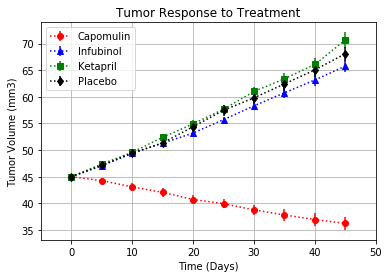

In [345]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

x_axis = np.arange(0,50,5)

ax.errorbar(x_axis,formatted_mean_df['Capomulin'], yerr=formatted_sem_df['Capomulin'],marker="o",color='red',linestyle=":",label='Capomulin')
ax.errorbar(x_axis,formatted_mean_df['Infubinol'], yerr=formatted_sem_df['Infubinol'],marker="^",color='blue',linestyle=':',label='Infubinol')
ax.errorbar(x_axis,formatted_mean_df['Ketapril'], yerr=formatted_sem_df['Ketapril'],marker="s",color='green',linestyle=":",label='Ketapril')
ax.errorbar(x_axis,formatted_mean_df['Placebo'], yerr=formatted_sem_df['Placebo'],marker="d",color='black',linestyle=":",label='Placebo')

ax.set_xlim(-5, 50)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.legend()
plt.grid()


# Save the Figure
plt.savefig("./Images/Tumor_Treatment_Response.png")
plt.show()

In [346]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_metastatic_resp = drug_timepoint_grouped["Metastatic Sites"].mean()

# Convert to DataFrame

mean_metastatic_resp_df = pd.DataFrame(mean_metastatic_resp)

# Preview DataFrame

mean_metastatic_resp_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [347]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

from scipy.stats import sem

standard_error_mr = drug_timepoint_grouped["Metastatic Sites"].sem()

# Convert to DataFrame

standard_error_mr_df = pd.DataFrame(standard_error_mr)

# Preview DataFrame

standard_error_mr_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [348]:
# Minor Data Munging to Re-Format the Data Frames

formatted_mean_mr_df = mean_metastatic_resp_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked

formatted_mean_mr_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [349]:
# Minor Data Munging to Re-Format the Data Frames

formatted_SE_mr_df = standard_error_mr_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked

formatted_SE_mr_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


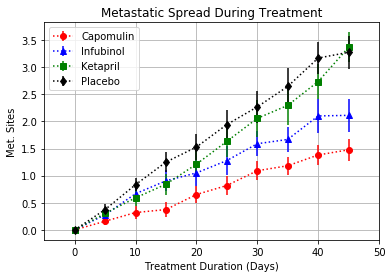

In [350]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

x_axis = np.arange(0,50,5)

ax.errorbar(x_axis,formatted_mean_mr_df['Capomulin'], yerr=formatted_SE_mr_df['Capomulin'],marker="o",color='red',linestyle=":",label='Capomulin')
ax.errorbar(x_axis,formatted_mean_mr_df['Infubinol'], yerr=formatted_SE_mr_df['Infubinol'],marker="^",color='blue',linestyle=':',label='Infubinol')
ax.errorbar(x_axis,formatted_mean_mr_df['Ketapril'], yerr=formatted_SE_mr_df['Ketapril'],marker="s",color='green',linestyle=":",label='Ketapril')
ax.errorbar(x_axis,formatted_mean_mr_df['Placebo'], yerr=formatted_SE_mr_df['Placebo'],marker="d",color='black',linestyle=":",label='Placebo')
ax.set_xlim(-5, 50)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")


plt.legend()
plt.grid()

# Save the Figure
plt.savefig("./Images/Metastatic Spread During Treatment.png")
plt.show()

In [351]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count = drug_timepoint_grouped["Mouse ID"].count()

# Convert to DataFrame

mouse_count_df = pd.DataFrame(mouse_count)

# Preview DataFrame

mouse_count_df_renamed = mouse_count_df.rename(columns={"Mouse ID":"Mouse Count"})

mouse_count_df_renamed.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [352]:
# Minor Data Munging to Re-Format the Data Frames

formatted_mouse_count_df = mouse_count_df_renamed.pivot_table(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview that Reformatting worked

formatted_mouse_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [353]:
Per_Capo = [(num/formatted_mouse_count_df['Capomulin'].iloc[0]) * 100 for num in formatted_mouse_count_df["Capomulin"]]
Per_Ceft = [(num/formatted_mouse_count_df['Ceftamin'].iloc[0]) * 100 for num in formatted_mouse_count_df["Ceftamin"]]
Per_Inf = [(num/formatted_mouse_count_df['Infubinol'].iloc[0]) * 100 for num in formatted_mouse_count_df["Infubinol"]]
Per_Keta = [(num/formatted_mouse_count_df['Ketapril'].iloc[0]) * 100 for num in formatted_mouse_count_df["Ketapril"]]
Per_Naft = [(num/formatted_mouse_count_df['Naftisol'].iloc[0]) * 100 for num in formatted_mouse_count_df["Naftisol"]]
Per_Plac = [(num/formatted_mouse_count_df['Placebo'].iloc[0]) * 100 for num in formatted_mouse_count_df["Placebo"]]
Per_Prop = [(num/formatted_mouse_count_df['Propriva'].iloc[0]) * 100 for num in formatted_mouse_count_df["Propriva"]]
Per_Ram = [(num/formatted_mouse_count_df['Ramicane'].iloc[0]) * 100 for num in formatted_mouse_count_df["Ramicane"]]
Per_Stel = [(num/formatted_mouse_count_df['Stelasyn'].iloc[0]) * 100 for num in formatted_mouse_count_df["Stelasyn"]]
Per_Zoni = [(num/formatted_mouse_count_df['Zoniferol'].iloc[0]) * 100 for num in formatted_mouse_count_df["Zoniferol"]]

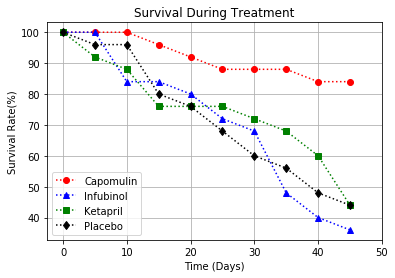

In [354]:
# Generate the Plot (with Error Bars)

ax = plt.gca()

x_axis = np.arange(0,50,5)

plt.plot(x_axis,Per_Capo,marker='o',color='red',label="Capomulin",linestyle=":")
plt.plot(x_axis,Per_Inf,marker='^',color='blue',label="Infubinol",linestyle=":")
plt.plot(x_axis,Per_Keta,marker='s',color='green',label="Ketapril",linestyle=":")
plt.plot(x_axis,Per_Plac,marker='d',color='black',label="Placebo",linestyle=":")


plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")

plt.xlim(-2.5, 50, 10)

plt.legend()
plt.grid()


# Save the Figure
plt.savefig("./Images/Survival During Treatment.png")
plt.show()

In [355]:
formatted_mean_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [356]:
per_change = (formatted_mean_df.iloc[-1] - formatted_mean_df.iloc[0]) / formatted_mean_df.iloc[0] * 100
per_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [357]:
relevant_drugs = per_change.loc[["Capomulin","Infubinol","Ketapril","Placebo"]]
relevant_drugs_df = pd.DataFrame(relevant_drugs)

In [358]:
per_change_values = list(per_change)
per_change_values2 = round(per_change_values[0]),round(per_change_values[2]),round(per_change_values[3]),round(per_change_values[5])
per_change_values3 = list(per_change_values2)
per_change_values3

[-19, 46, 57, 51]

In [359]:
drug_names = per_change.index.values.tolist()
drug_name2 = drug_names[0],drug_names[2],drug_names[3],drug_names[5]
drug_name3 = list(drug_name2)
drug_name3

['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

In [360]:
zipped = zip(drug_names,per_change_values)
list_of_tuples = list(zipped)
list_rel_tuples = [list_of_tuples[0],list_of_tuples[2],list_of_tuples[3],list_of_tuples[5]]
list_rel_tuples

[('Capomulin', -19.475302667894173),
 ('Infubinol', 46.12347172785187),
 ('Ketapril', 57.028794686606076),
 ('Placebo', 51.29796048315153)]

<Figure size 1080x720 with 0 Axes>

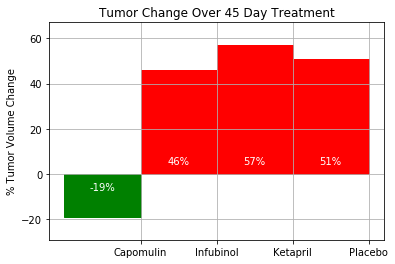

In [361]:


plt.figure(figsize=(15, 10))

fig, ax = plt.subplots()
rects1 = ax.bar(drug_name3,per_change_values3,align='edge',width=1.0)

for i in range(len(per_change_values3)):
    if per_change_values3[i] < 0:
        rects1[i].set_color('g')
        
    else:
        rects1[i].set_color('r')


x = np.arange(1,len(drug_name3)+1)  # the label locations

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(x)
ax.set_xticklabels(drug_name3,rotation=0,ha='center')

# Set the limits of the y axis
plt.ylim(min(per_change_values3) - 10 , max(per_change_values3) + 10)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height < 0:
            ax.annotate('{0:.0%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    color='white', xytext=(0,35), # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='top')
        
        else:
            ax.annotate('{0:.0%}'.format(height/100),
                    xy=(rect.get_x() + rect.get_width() / 2, 50),
                    color='white', xytext=(0,-105), # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

autolabel(rects1)

plt.grid()


# Save the Figure
plt.savefig("./Images/Tumor Change Over 45 Days.png")
plt.show()

